In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

#Data import.

Let's first import the dataset that we prepared before.

In [3]:
#data = pd.read_csv('/content/drive/MyDrive/ML/MyProject/creditcard_selected.csv')

# the file is too big to be simply uploaded to github, had to use git LFS, the file in the repository is actually a pointer: open the file -> "View raw" -> copy the link
data = pd.read_csv('https://media.githubusercontent.com/media/glromane/MLBas_Romanenko_exam/refs/heads/main/creditcard_selected.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008099,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.989541,0
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936639,0
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816241,0
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248352,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282951,23.996111,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.261365,0
282952,23.996389,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,3.210440,0
282953,23.996667,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,4.217741,0
282954,23.996667,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,2.302585,0


# Few initial checks.
Before starting model training and validation (we will be using KFold method) let's check first if the splitting to train and test sub-samples is done sufficiently -- since we know that the dataset is very inbalanced we want to check that the fraud entries get in each sub-sample in the proportions more or less similar to the folds division.

In [4]:
# check the proportions of the fraod in the sub-samples
num_folds = 5 # using the default, higher number of folds would lead to too few fraud entries in the folds
seed = 7

array = data.values
X = array[:,0:30]
Y = array[:,30]

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

for i, (train_index, test_index) in enumerate(kfold.split(X, Y)):
  print(f"Fold {i}:")
  train_labels = X[train_index]
  train_target = Y[train_index]

  test_labels = X[test_index]
  test_target = Y[test_index]

  print("N frauds in train sample:", np.sum(train_target))
  print("N frauds in test sample:", np.sum(test_target))
  print("N frauds in total:", np.sum(train_target) + np.sum(test_target))

Fold 0:
N frauds in train sample: 383.0
N frauds in test sample: 82.0
N frauds in total: 465.0
Fold 1:
N frauds in train sample: 366.0
N frauds in test sample: 99.0
N frauds in total: 465.0
Fold 2:
N frauds in train sample: 378.0
N frauds in test sample: 87.0
N frauds in total: 465.0
Fold 3:
N frauds in train sample: 368.0
N frauds in test sample: 97.0
N frauds in total: 465.0
Fold 4:
N frauds in train sample: 365.0
N frauds in test sample: 100.0
N frauds in total: 465.0


Looks good. Now let's procced with training and CV with the "default" settings using the whole dataset. For the metrics we will be using the the "precision", "recall", "f1" and "roc_auc" since the dataset is very inbalanced and for exaple "accuracy" could be misleading.
(the fraction of class "0" is 99.84% so even the model that always says 0 will have the accuracy > 0.99)

In [5]:
#test for N features
kfold = KFold(n_splits=5, random_state=7, shuffle = True)
model = LogisticRegression(solver='lbfgs', max_iter=500)
scoring = ['precision', 'recall', 'f1', 'roc_auc']

cv_results = cross_validate(model, data.drop(columns=['Class']), data['Class'], cv=kfold, scoring=scoring)

print("(default) prec. [mean (std)]: %f(%f)" % (cv_results['test_precision'].mean(), cv_results['test_precision'].std()))
print("(default) rec. [mean (std)]: %f(%f)" % (cv_results['test_recall'].mean(), cv_results['test_recall'].std()))
print("(default) f1 [mean (std)]: %f(%f)" % (cv_results['test_f1'].mean(), cv_results['test_f1'].std()))
print("(default) roc_auc [mean (std)]: %f(%f)" % (cv_results['test_roc_auc'].mean(), cv_results['test_roc_auc'].std()))

(default) prec. [mean (std)]: 0.863815(0.021469)
(default) rec. [mean (std)]: 0.617983(0.041236)
(default) f1 [mean (std)]: 0.719752(0.030871)
(default) roc_auc [mean (std)]: 0.970746(0.002600)


Here I want to discuss the roc_aoc metric. According to this very preliminary test above, the roc_aoc score tells us that the model is already very good. Although, looking at the other metrics and knowing that the dataset is very imbalanced I doubt that roc_auc can be representative. It probably comes from the fact that increasing the number of positive guesses the FPR would not change much since the TN in the denominator is still going to by large. I think it might be better explained here:
https://juandelacalle.medium.com/how-and-why-i-switched-from-the-roc-curve-to-the-precision-recall-curve-to-analyze-my-imbalanced-6171da91c6b8

where I also borrowed the code to compare the ROC corve with the PR one.

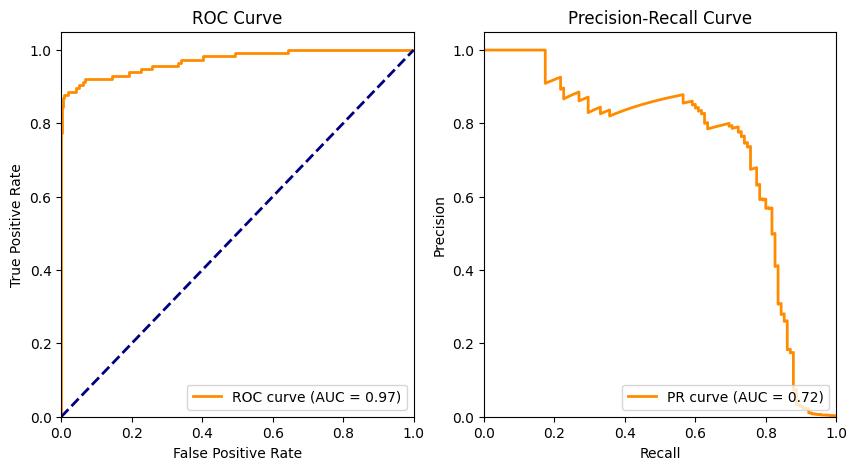

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=7)

# Train
model = LogisticRegression(solver='lbfgs', max_iter=500)
model.fit(X_train, y_train)

# Get the probability scores for the testing set
y_score = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Calculate the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
pr_auc = average_precision_score(y_test, y_score)

# Plot the ROC curve
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

# Plot the Precision-Recall curve
plt.subplot(1,2,2)
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

Indeed the PR curve for example is way less optimistic. From now on I will drop the roc_auc metric.

# Checking different models.

Here I checked several different ML models commonly suggested in the web for classification problems. The models are taken with the default settings to have the first idea which one to choose to proceed.

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [8]:
# define the list of models
models = []
models.append(( 'LR'   , LogisticRegression(max_iter=500)))
models.append(( 'GNB'  , GaussianNB()))
models.append(( 'RC'  , RidgeClassifier()))
models.append(( 'SVM' , LinearSVC()))
models.append(( 'DTC' , DecisionTreeClassifier()))

results = []
names = []
scoring = ['precision', 'recall', 'f1']

# loop over the models and write the results
for name, model in models:
  kfold = KFold(n_splits=5, random_state=7, shuffle=True)
  cv_results = cross_validate(model, data.drop(columns=['Class']), data['Class'], cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)

Now let's plot the performance metrics (precision, recall and f1) and see which ones performed better.

<ipython-input-9-04f11a951194>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(names)
<ipython-input-9-04f11a951194>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(names)
<ipython-input-9-04f11a951194>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(names)


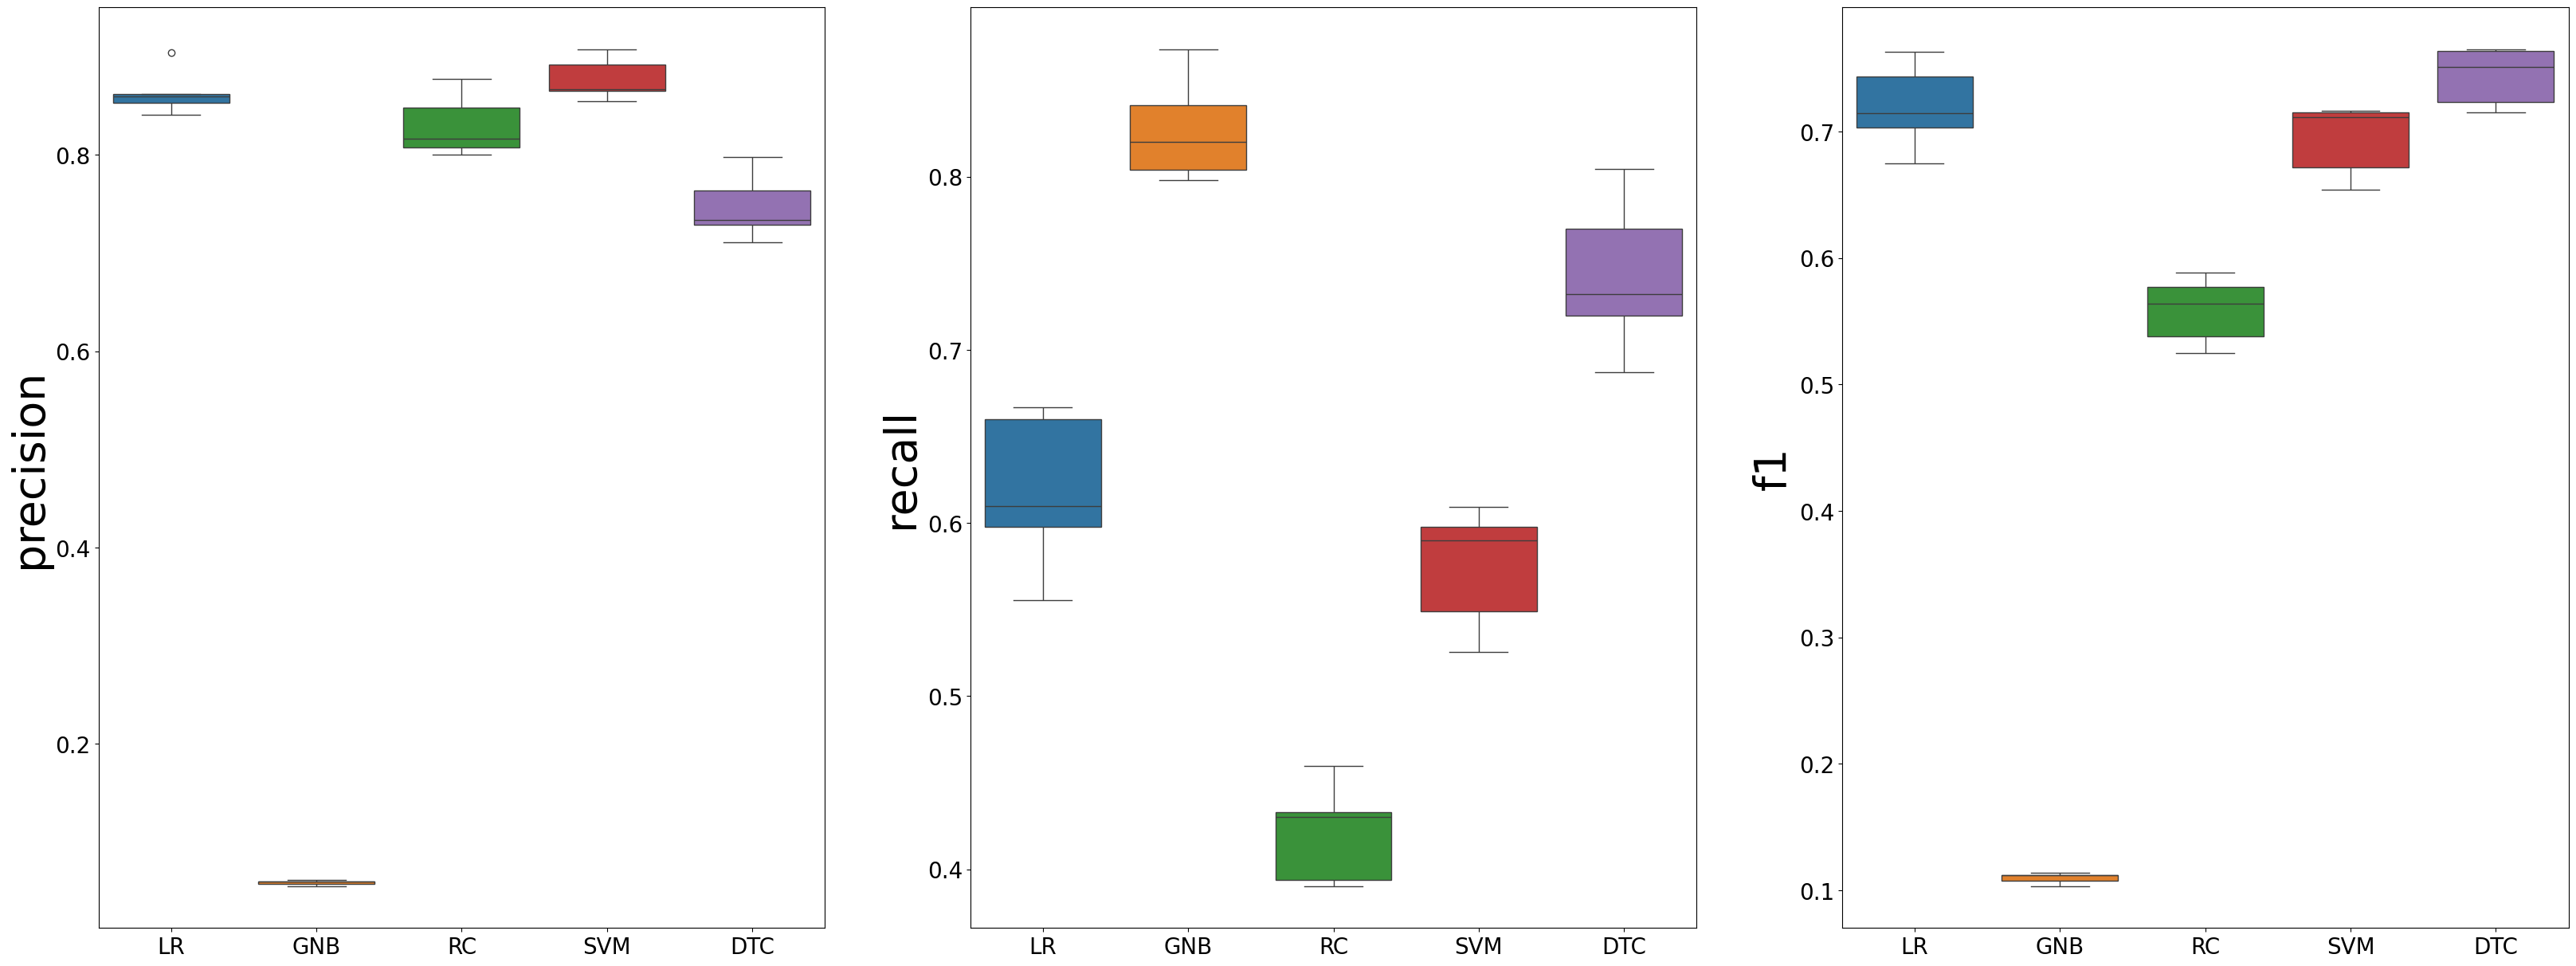

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(40, 15))

for i in range(3):
  scores_tmp = []
  for result in results:
    scores_tmp.append(result['test_' + scoring[i]])

  myplot = sns.boxplot(scores_tmp, ax=axs[i])
  axs[i].set_xticklabels(names)
  myplot.set_ylabel(scoring[i],fontsize=40)
  myplot.tick_params(labelsize=20)

plt.show()

According to the results of this test the best ones seem to be LR and DTC. I will choose the LR for the further tests and adjustments.

Note: the discussion about the metric/metrics we will be aiming to improve will take place later.

# Selecting features.

Before proceeding with more training and tweaking we need to remember that one should use as less computational power as possible (not sucrificing the performance of course), so lets check first if we need all the features for training.

For this I will use 'SelectKBest' method with scale functions  'f_classif' and 'mutual_info_classif' as suggested in the documentation for classification problems (https://scikit-learn.org/dev/modules/feature_selection.html#univariate-feature-selection).

Note: 'chi2' score function is also suggested but it needs the features to have positive values.

In [10]:
#define selectors and get the results
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, mutual_info_classif

feature_selector1 = SelectKBest(f_classif, k="all")
feature_selector2 = SelectKBest(mutual_info_classif, k="all")

feature_selector1.fit(data.drop(columns=['Class']), data['Class'])
feature_selector2.fit(data.drop(columns=['Class']), data['Class'])

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x79e9ba8f9630>)

Now, plot the scores from these to methods (normalizing by the max value for a better representation).

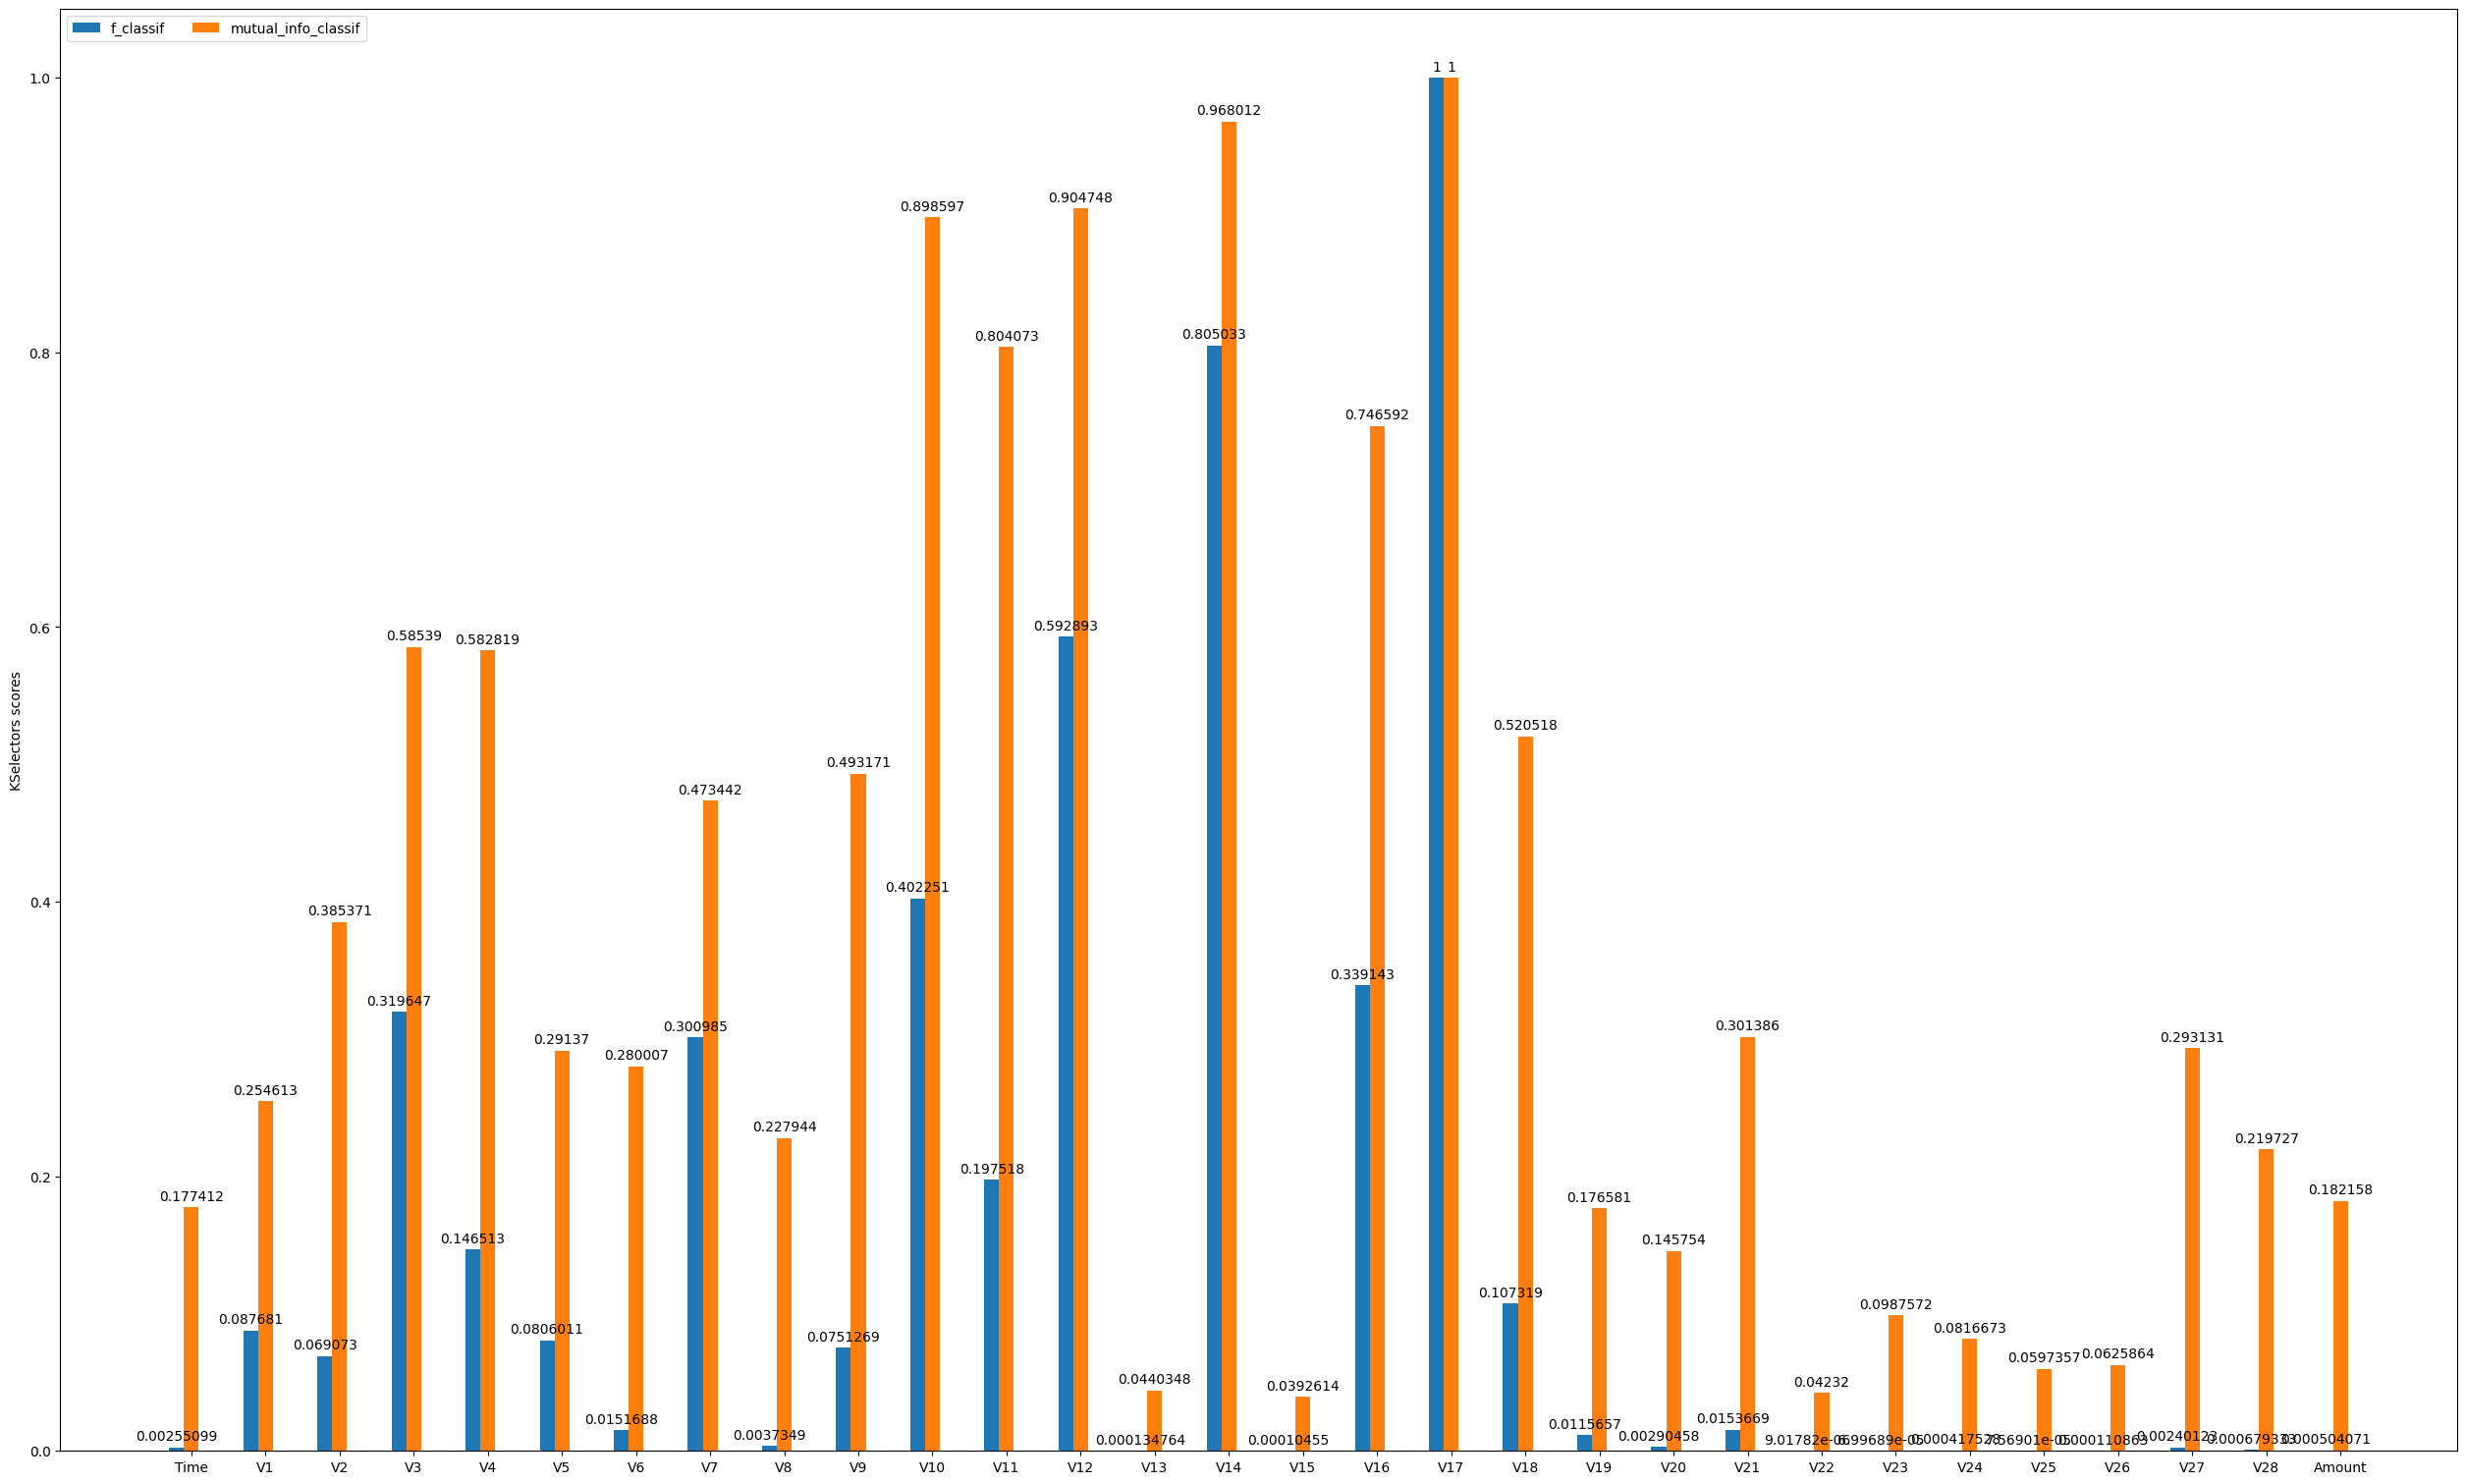

In [12]:
features = np.array(data.columns[:-1])

score1 = feature_selector1.scores_/np.max(np.fabs(feature_selector1.scores_))
score2 = feature_selector2.scores_/np.max(np.fabs(feature_selector2.scores_))

scores = {
    'f_classif': score1,
    'mutual_info_classif': score2
}

x = np.arange(features.size)  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in scores.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('KSelectors scores')
ax.set_xticks(x + width, features)
ax.legend(loc='upper left', ncols=3)
#ax.set_ylim(0, 1)

plt.rcParams['figure.figsize'] = [25, 15]
plt.show()

In [13]:
#save the scores in a DF
FeatureSelScores = pd.DataFrame(data = np.transpose(np.array([score1, score2])), index=features, columns=['f_classif', 'mutual_info_classif'])
FeatureSelScores

,f_classif,mutual_info_classif
Time,0.002551,0.177412
V1,0.087681,0.254613
V2,0.069073,0.385371
V3,0.319647,0.585390
V4,0.146513,0.582819
V5,0.080601,0.291370
V6,0.015169,0.280007
V7,0.300985,0.473442
V8,0.003735,0.227944
V9,0.075127,0.493171


Two metrics demonstrate similar dynamics. Now I choose one (=mutual_info_classif), sort it by the value to be used later to drop lest important features in our model tests. (I chose mutual_info_classif one because it looks less extreme but the dynamics w.r.t. othe one is similar anyway)

In the test below I will be dropping features according to their importance (or rather unimportance) in a loop starting from 1 to 25, writing the resulting performance of the LR model.

In [14]:
#test for N features

scoring = ['precision', 'recall', 'f1'] # metrics to calculate

model_scores_mean = pd.DataFrame(index=range(0, 25), columns=scoring)
model_scores_std = pd.DataFrame(index=range(0, 25), columns=scoring)

for i in range(0, 25):
  to_drop = np.array(FeatureSelScores.sort_values(by='mutual_info_classif').index)[:i] #sorting by importance and writing to a list with the features to drop
  to_drop = np.append(to_drop, ['Class']) # adding the target to the dropping list

  kfold = KFold(n_splits=5, random_state=7, shuffle = True)
  model = LogisticRegression(solver='lbfgs', max_iter=500)

  cv_results = cross_validate(model, data.drop(columns=to_drop), data['Class'], cv=kfold, scoring=scoring)

  for score in scoring: #writing mean & std scores of performance metrics
    model_scores_mean.at[i, score] = np.mean(cv_results['test_'+score])
    model_scores_std.at[i, score] = np.std(cv_results['test_'+score])


Now let's plot the results of the test.

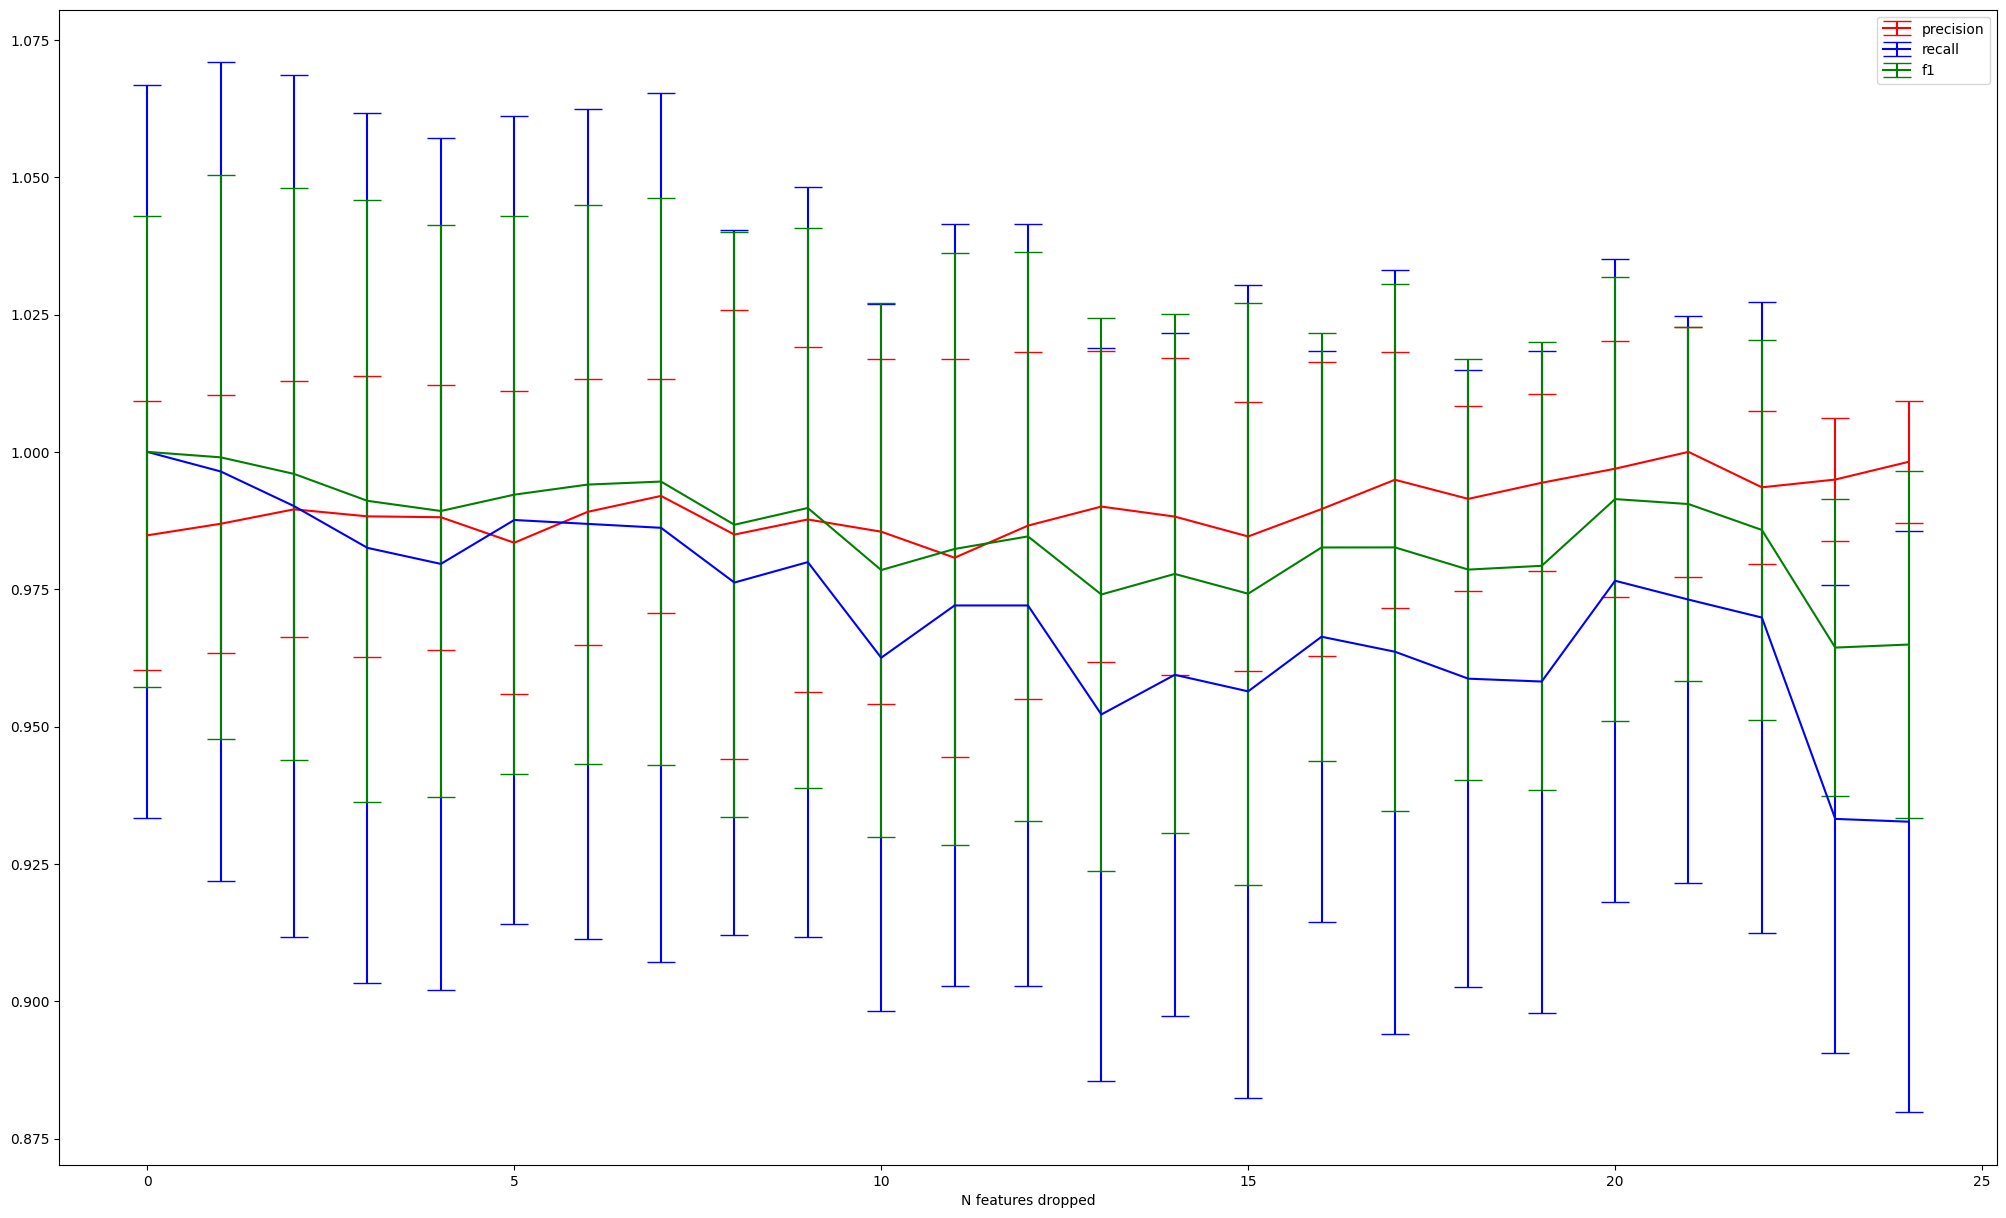

In [15]:
# === optional section to normalize the values for a better representation ===
from sklearn.preprocessing import MaxAbsScaler
maxabs = MaxAbsScaler()

for i in range(3):
  model_scores_mean[scoring[i]] = maxabs.fit_transform(pd.DataFrame(model_scores_mean[scoring[i]]))
  model_scores_std[scoring[i]] = maxabs.transform(pd.DataFrame(model_scores_std[scoring[i]]))
# ===========================================

plt.errorbar(np.arange(0, 25), np.array(model_scores_mean['precision']), np.array(model_scores_std['precision']), color='red', label='precision', capsize=10)
plt.errorbar(np.arange(0, 25), np.array(model_scores_mean['recall']), np.array(model_scores_std['recall']), color='blue', label='recall', capsize=10)
plt.errorbar(np.arange(0, 25), np.array(model_scores_mean['f1']), np.array(model_scores_std['f1']), color='green', label='f1', capsize=10)
plt.legend(loc="upper right")
plt.xlabel("N features dropped")
plt.rc('font', size=20)
plt.show()

To my taste I'd say that we can "safely" drop the first 8 metrics (sorted by mutual_info_classif) without sacrificing much performance. Let's define the dropping list.

In [16]:
#define the list of the features to be dropped for the later tests

#FeatureSelScores.sort_values(by='f_classif').index
to_drop = np.array(FeatureSelScores.sort_values(by='mutual_info_classif').index)[:8] # I chose this one because it looks less extreme but the dynamics w.r.t. the other one is similar anyway
to_drop = np.append(to_drop, ['Class'])
to_drop

array(['V15', 'V22', 'V13', 'V25', 'V26', 'V24', 'V23', 'V20', 'Class'],
      dtype=object)

# Choosing hyperparameters and metric to aim.

In this section I will test different solvers and hyperparameters for the linear model. Here I will use only a couple of basic hyperparameters to play around.

For the solvers I will try 'lbfgs', 'liblinear' and 'newton-cholesky'. The first 2 are the basic ones and the last one is suggested for the case when n_samples >> n_features (https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression).

1st hyperparameter I will vary is the inverse of regularization strength C.

2nd hyperparameter will be the weights assosiated with classes. Since we know that the dataset is very imbalanced we can expect this can affect the result quite noticeably. Let's discuss it a bit more.

By the default the weights are set to be 1 for both of the classes (which are 0 and 1). For this hyperparameter there is an option 'balanced' to compencate the imbalance. Let's estimate it.

In [17]:
from sklearn.utils.class_weight import compute_class_weight

balanced_weights = compute_class_weight(class_weight="balanced", classes=np.unique(data['Class']), y=data['Class'])
balanced_weights

array([  0.50082304, 304.25376344])

If we check the proportion between the weights it will match the imbalance level of the dataset (which is quite expected).

In [18]:
N_all = data.shape[0] # all entries
N_frauds = data[data['Class']==1].shape[0] # fraud cases
N_non_frauds = N_all - N_frauds

print("imbalance ratio from the data = ", N_non_frauds/N_frauds)
print("imbalance ratio from the weights = ", balanced_weights[1]/balanced_weights[0])

imbalance ratio from the data =  607.5075268817204
imbalance ratio from the weights =  607.5075268817204


Now let's try to find the best setup for different settings using GridSearchCV method. For the weights I will change only the weight assotiated with the class "1" for the simplicity (I could change both the weights but at the end its their ratio that matters, and it can be done by only changing one of them), the other one is by default will be set to unity. We will start with one and arrive to 600 (~imbalance level).

In [19]:
from sklearn.model_selection import GridSearchCV


to_drop = np.array(FeatureSelScores.sort_values(by='mutual_info_classif').index)[:8] # I chose this one because it looks less extreme but the dynamics w.r.t. othe one is similar anyway
to_drop = np.append(to_drop, ['Class'])

model = LogisticRegression(max_iter=500)



# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],
              'solver':['lbfgs', 'liblinear', 'newton-cholesky'],
              'class_weight': [{1:1}, {1:100}, {1:200}, {1:300}, {1:400}, {1:500}, {1:600}]}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# fitting the model for grid search
grid.fit(data.drop(columns=to_drop), data['Class'])

# print best parameter after tuning
print(grid.best_params_)

{'C': 0.1, 'class_weight': {1: 1}, 'solver': 'lbfgs'}


We got basically the default set of parameters (except C which is 0.1) . Now I want to discuss the choice of the main metric we would want to improve.

Since the dataset is about bank frauds the choice must be -- recall. Because we want to spot as many fraud cases as possible even sacrificing the precision -- it's better to later check (by humans or more advanced models) more cases even if they're going to be negative then to overlook an actual fraud.

Among the settings that we tested the most influencing one -- class_weight.

Note: the other 2 I briefly tested a bit randomly playing around and they seem to barely affect the result -- flactuations within std (of course a proper study can be done but here I focus on the most influencing parameter -- weights).

Let's use the same set of weights we used above but this time we will loop over them and examine the results.

In [20]:
#test1 for different weights

scoring = ['precision', 'recall', 'f1', 'roc_auc'] # adding the roc_auc to demonstrate again that it's not representative -- basically stays constant

weights = [{1:1}, {1:100}, {1:200}, {1:300}, {1:400}, {1:500}, {1:600}]

model_scores_mean = pd.DataFrame(index=range(0, len(weights)), columns=scoring)
model_scores_std = pd.DataFrame(index=range(0, len(weights)), columns=scoring)

for i in range(0, len(weights)):
  kfold = KFold(n_splits=5, random_state=7, shuffle = True)
  model = LogisticRegression(solver='lbfgs', max_iter=500, C=0.1, class_weight=weights[i])

  cv_results = cross_validate(model, data.drop(columns=to_drop), data['Class'], cv=kfold, scoring=scoring)

  for score in scoring: #writing mean & std scores of performance metrics
    model_scores_mean.at[i, score] = np.mean(cv_results['test_'+score])
    model_scores_std.at[i, score] = np.std(cv_results['test_'+score])

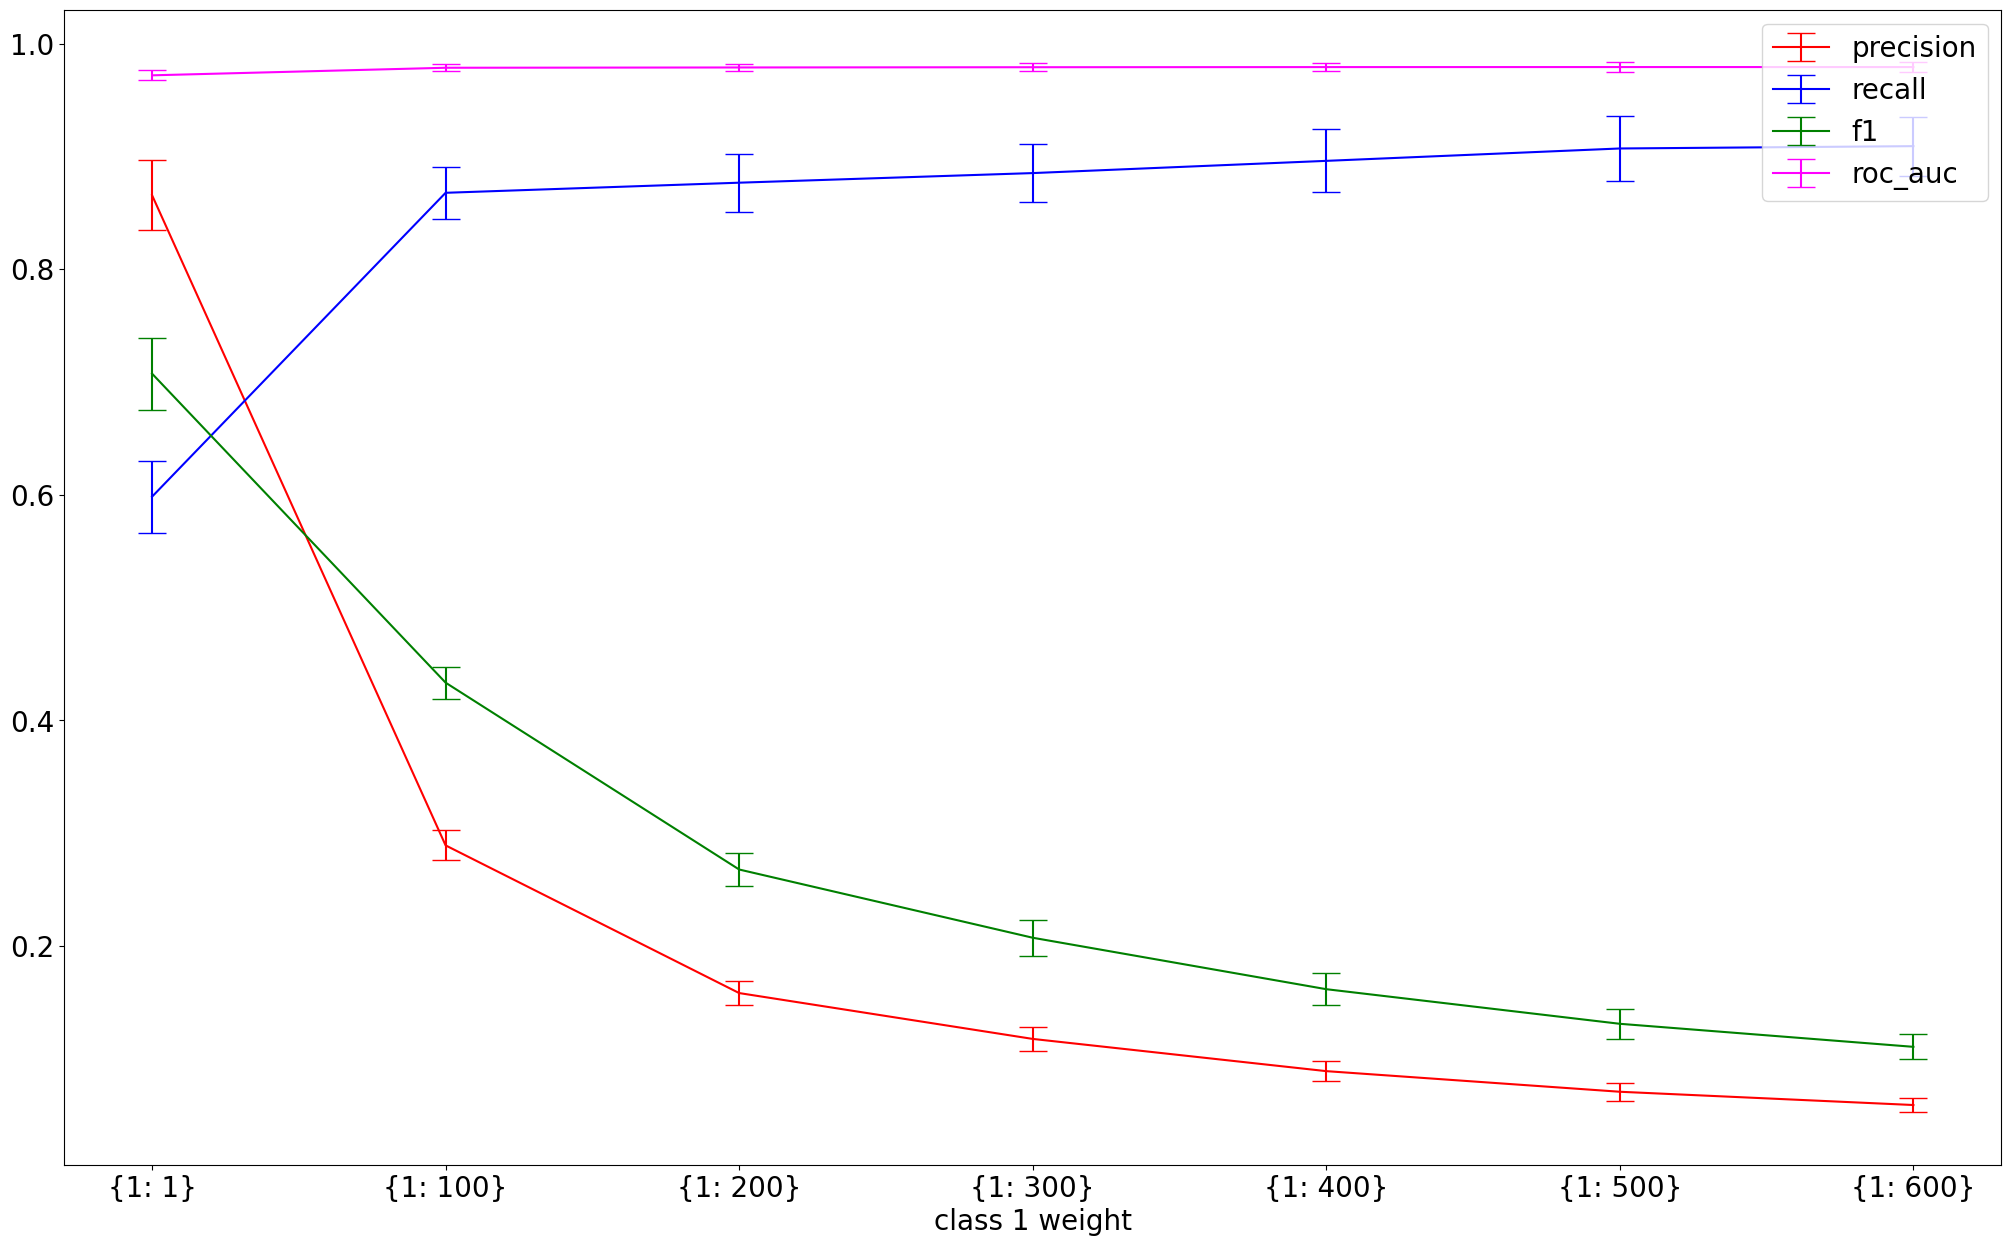

In [21]:
#plot the results for different weights -- test1

fig, ax = plt.subplots()
ax.set_xticks(range(len(weights)))
ax.set_xticklabels(weights)
ax.set_xlabel("class 1 weight")
plt.errorbar(np.arange(0, len(weights)), np.array(model_scores_mean['precision']), np.array(model_scores_std['precision']), color='red', label='precision', capsize=10)
plt.errorbar(np.arange(0, len(weights)), np.array(model_scores_mean['recall']), np.array(model_scores_std['recall']), color='blue', label='recall', capsize=10)
plt.errorbar(np.arange(0, len(weights)), np.array(model_scores_mean['f1']), np.array(model_scores_std['f1']), color='green', label='f1', capsize=10)
plt.errorbar(np.arange(0, len(weights)), np.array(model_scores_mean['roc_auc']), np.array(model_scores_std['roc_auc']), color='magenta', label='roc_auc', capsize=10)
plt.legend(loc="upper right")
plt.rc('font', size=20)
plt.show()

From the plot above we see that increasing the weight for class 1 gives us a better performance in terms of recall but with the cost of presicion. In the end it has to be a compromise but as it was anticipated before the main metric is recall. Nevertheless, it seems that recall does not change much from \{1:100\} to \{1:600\} but precision does. So, let's look closely at the region from \{1:1:\} to \{1:100\} with a finer binning and see if we can find a better compromise.

Also, as we discussed before the roc_auc metric is not very helpful in our case -- ~1 for all the configurations.

In [22]:
#test2 for different weights

scoring = ['precision', 'recall', 'f1', 'roc_auc'] # adding the roc_auc to demonstrate again that it's not representative -- basically stays constant

weights = [{1:5}, {1:10}, {1:20}, {1:30}, {1:40}, {1:50}, {1:60}, {1:70}, {1:80}, {1:90}, {1:100}, {1:110}, {1:120}]

model_scores_mean = pd.DataFrame(index=range(0, len(weights)), columns=scoring)
model_scores_std = pd.DataFrame(index=range(0, len(weights)), columns=scoring)

for i in range(0, len(weights)):
  kfold = KFold(n_splits=5, random_state=7, shuffle = True)
  model = LogisticRegression(solver='lbfgs', max_iter=500, C=0.1, class_weight=weights[i])

  cv_results = cross_validate(model, data.drop(columns=to_drop), data['Class'], cv=kfold, scoring=scoring)

  for score in scoring: #writing mean & std scores of performance metrics
    model_scores_mean.at[i, score] = np.mean(cv_results['test_'+score])
    model_scores_std.at[i, score] = np.std(cv_results['test_'+score])

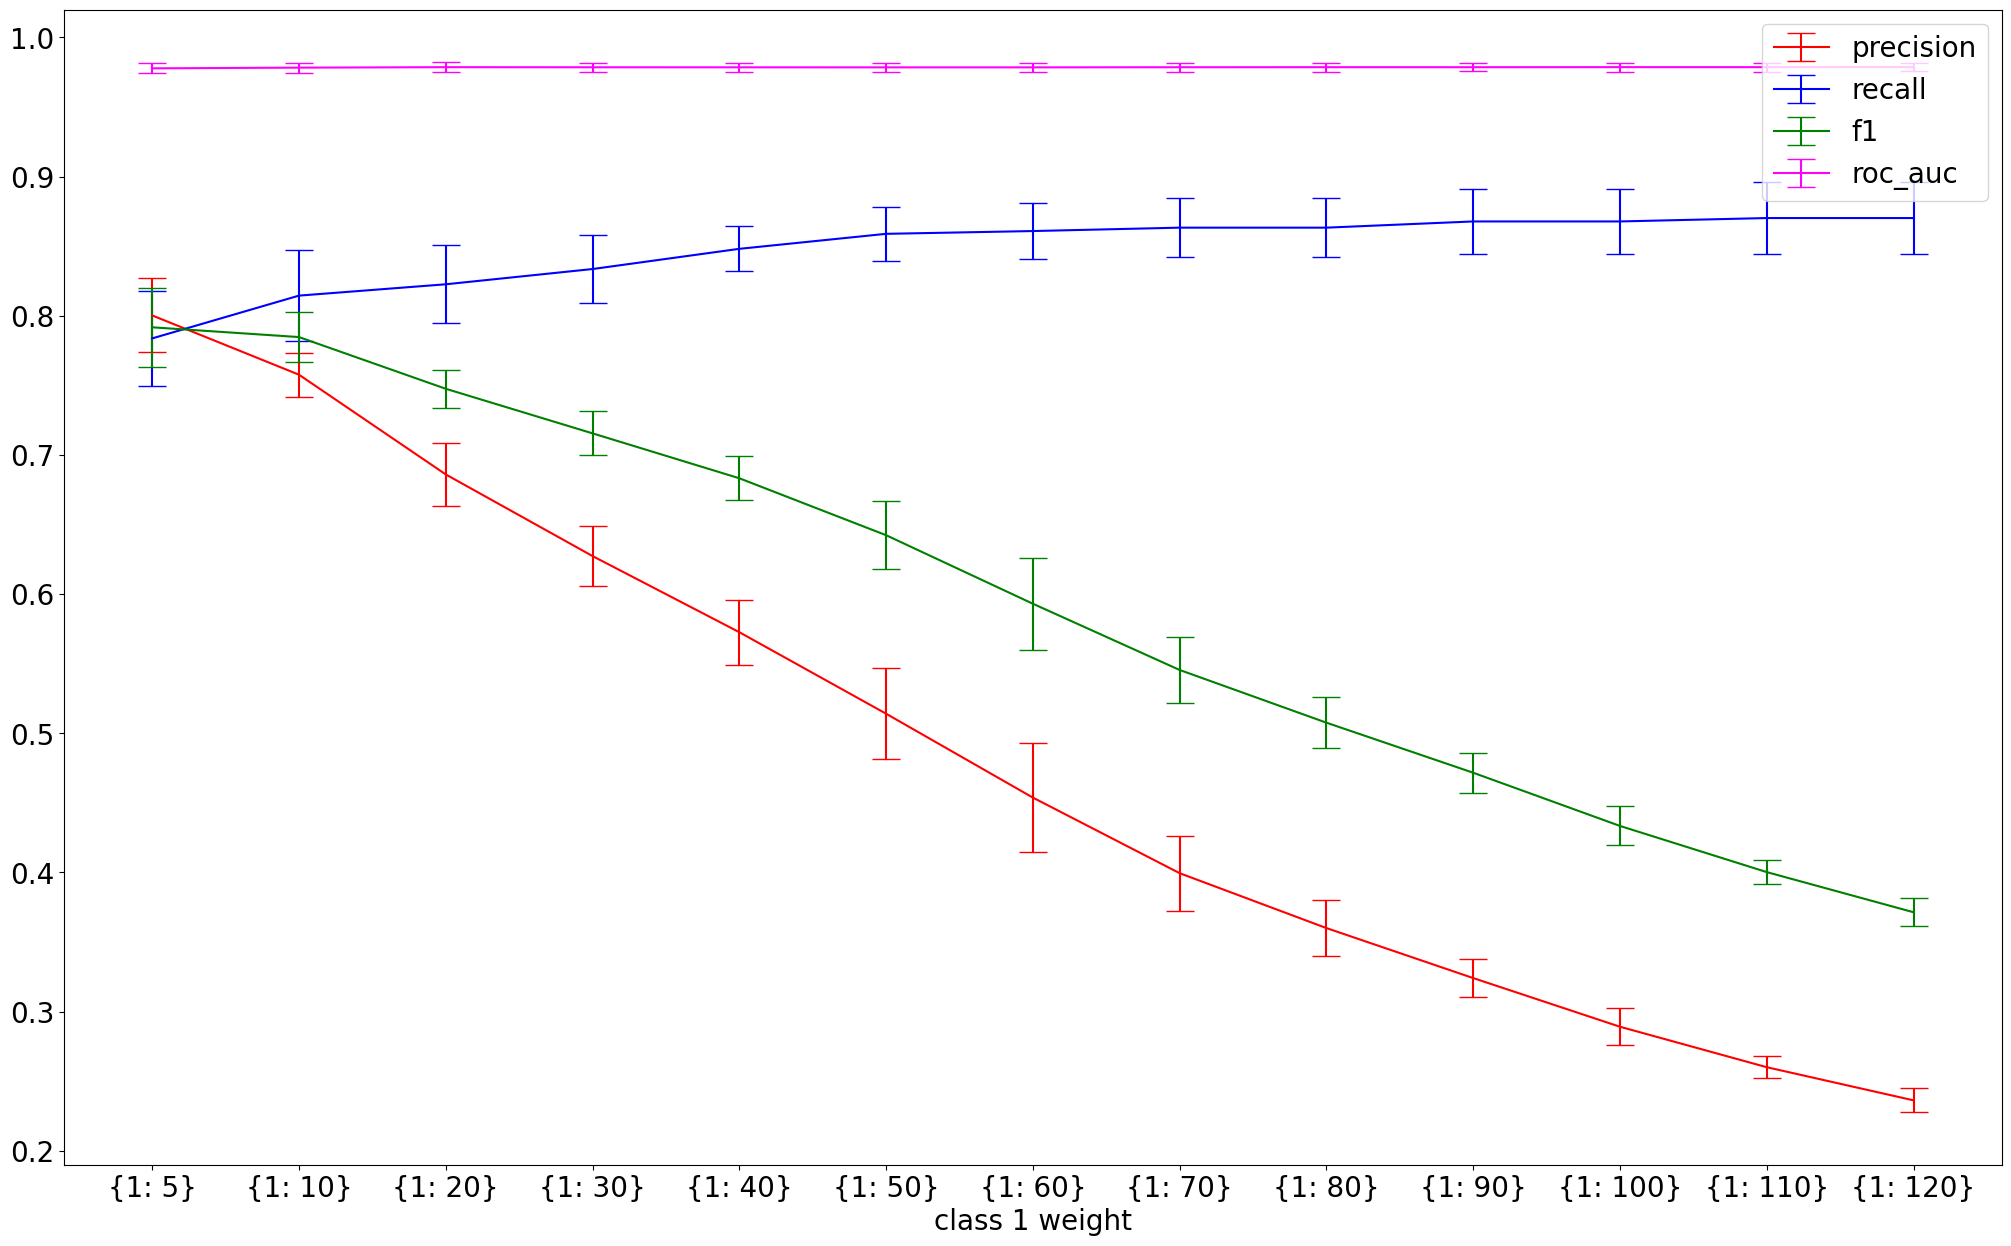

In [23]:
# plot the results for different weights -- test2

fig, ax = plt.subplots()
ax.set_xticks(range(len(weights)))
ax.set_xticklabels(weights)
ax.set_xlabel("class 1 weight")
plt.errorbar(np.arange(0, len(weights)), np.array(model_scores_mean['precision']), np.array(model_scores_std['precision']), color='red', label='precision', capsize=10)
plt.errorbar(np.arange(0, len(weights)), np.array(model_scores_mean['recall']), np.array(model_scores_std['recall']), color='blue', label='recall', capsize=10)
plt.errorbar(np.arange(0, len(weights)), np.array(model_scores_mean['f1']), np.array(model_scores_std['f1']), color='green', label='f1', capsize=10)
plt.errorbar(np.arange(0, len(weights)), np.array(model_scores_mean['roc_auc']), np.array(model_scores_std['roc_auc']), color='magenta', label='roc_auc', capsize=10)
plt.legend(loc="upper right")
plt.rc('font', size=20)
plt.show()

I think this is enough for the tests. I'd say that if there must be a compromise then it's better be \{1:50\}: recall ~0.85 and precision ~0.5.

Of course these are only my assumptions and maybe one should not compromise with the recall performance for this particular case (card frauds). Still, it seems that at the end we managed to improve the performance of the LR w.r.t. the default one and better understood the influence of some basic model parameters along the way.

#Conclusions.

In this notebook we checked different classification models in the end choosing the Linear one, examined the importance of the features, tested different confidurations of the LR and after the discussion about different metricies used for performance judgments chose recall since I think it's the most important for this case (bank frauds). We saw that dealing with this very imbalanced dataset the most influencing hyperparameter is class weight. Studying its effect at the end I chose an approximate value for it that in my opinion results in a good compromize between precision and recall.